# CitiBike 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [24]:
files = glob.glob('data/*.csv')
df = pd.DataFrame()
columns = ['tripduration', 'starttime', 'start station id', 'end station id',
           'bikeid', 'usertype', 'birth year', 'gender']
for file in files:
    df_tmp = pd.read_csv(file, usecols=columns , nrows=1e5)
    df = pd.concat([df, df_tmp])

In [25]:
df.columns

Index(['tripduration', 'starttime', 'start station id', 'end station id',
       'bikeid', 'usertype', 'birth year', 'gender'],
      dtype='object')

In [26]:
df.head()

,tripduration,starttime,start station id,end station id,bikeid,usertype,birth year,gender
0,840,2018-04-01 03:07:39.0700,72.0,379.0,31977,Subscriber,1973,1
1,1438,2018-04-01 07:20:02.2150,72.0,426.0,21403,Subscriber,1956,1
2,219,2018-04-01 08:11:14.4060,72.0,447.0,29081,Subscriber,1974,1
3,410,2018-04-01 08:52:32.3730,72.0,173.0,32130,Subscriber,1983,1
4,485,2018-04-01 09:37:34.3270,72.0,3159.0,30055,Subscriber,1978,1


In [27]:
df.describe()

,tripduration,start station id,end station id,bikeid,birth year,gender
count,1.200000e+06,1.199897e+06,1.199897e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,9.178784e+02,7.950779e+02,1.305621e+03,2.649395e+04,1.978879e+03,1.153109e+00
std,1.270727e+04,1.182562e+03,1.369276e+03,6.187682e+03,1.203711e+01,5.422733e-01
min,6.100000e+01,7.200000e+01,7.200000e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.540000e+02,1.670000e+02,3.370000e+02,2.024000e+04,1.969000e+03,1.000000e+00
50%,5.880000e+02,2.470000e+02,4.690000e+02,2.828000e+04,1.981000e+03,1.000000e+00
75%,1.018000e+03,4.720000e+02,3.148000e+03,3.164300e+04,1.989000e+03,1.000000e+00
max,5.891578e+06,3.716000e+03,3.716000e+03,3.568800e+04,2.002000e+03,2.000000e+00


In [28]:
df.shape

(1200000, 8)

## data Prepration

In [40]:
# replace spaces in column names to underscore
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# change starttime column from string to datetime
df.starttime = pd.to_datetime(df.starttime)

# create dummy variables
df['month'] = df.starttime.dt.month_name()
df['month_day'] = df.starttime.dt.day
df['week_day'] = df.starttime.dt.day_name()
df['hour'] = df.starttime.dt.hour

In [41]:
df.head()

,tripduration,starttime,start_station_id,end_station_id,bikeid,usertype,birth_year,gender,month,month_day,week_day,hour
0,840,2018-04-01 03:07:39.070,72.0,379.0,31977,Subscriber,1973,1,April,1,Sunday,3
1,1438,2018-04-01 07:20:02.215,72.0,426.0,21403,Subscriber,1956,1,April,1,Sunday,7
2,219,2018-04-01 08:11:14.406,72.0,447.0,29081,Subscriber,1974,1,April,1,Sunday,8
3,410,2018-04-01 08:52:32.373,72.0,173.0,32130,Subscriber,1983,1,April,1,Sunday,8
4,485,2018-04-01 09:37:34.327,72.0,3159.0,30055,Subscriber,1978,1,April,1,Sunday,9


## Raised Questions
* In order to predict future number of trips, What factors effect ?
* Does the trip duration has any correlation with other variables ?
* Does 

## Univariate Exploration

In [38]:
base_color = sns.color_palette()[0]

(0, 5000)

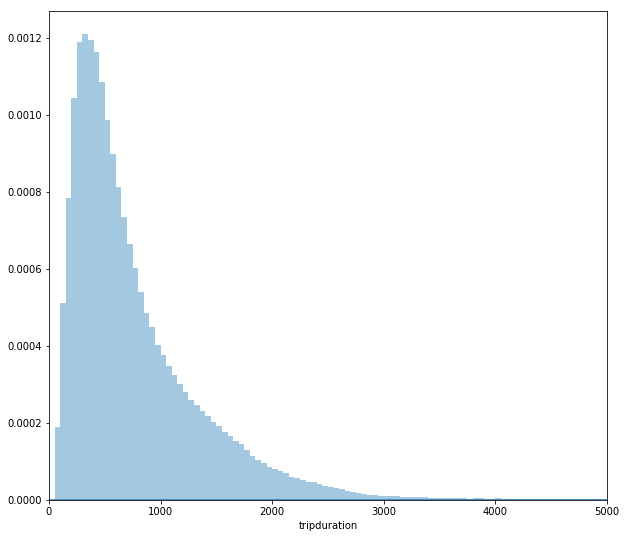

In [39]:
plt.figure(figsize=(10,9))
bins = np.arange(0, 5000, 50)
sns.distplot(df.tripduration, bins=bins, color=base_color)
plt.xlim(0,5000)

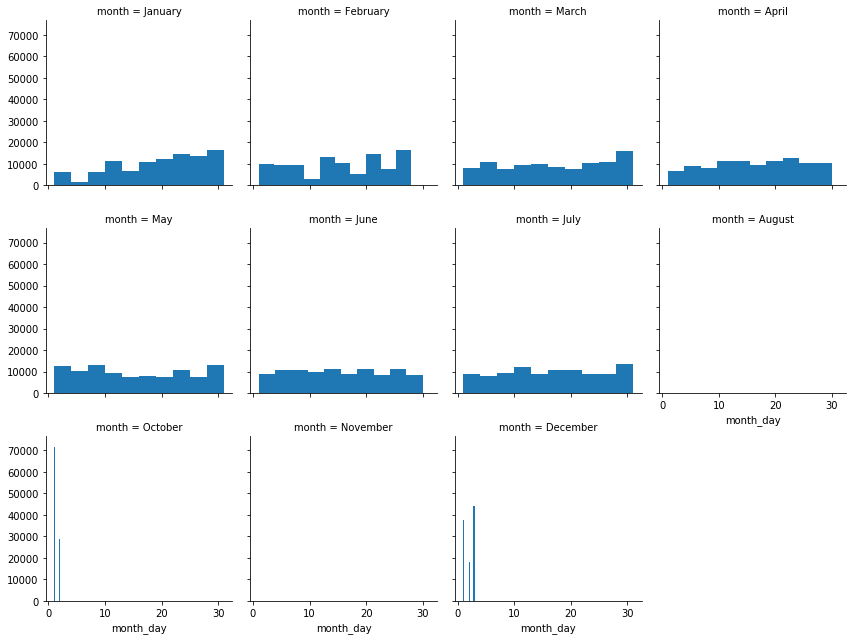

In [78]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'October', 'November', 'December']

g = sns.FacetGrid(df, col='month', col_wrap=4, col_order=month_order)
g.map(plt.hist, 'month_day');

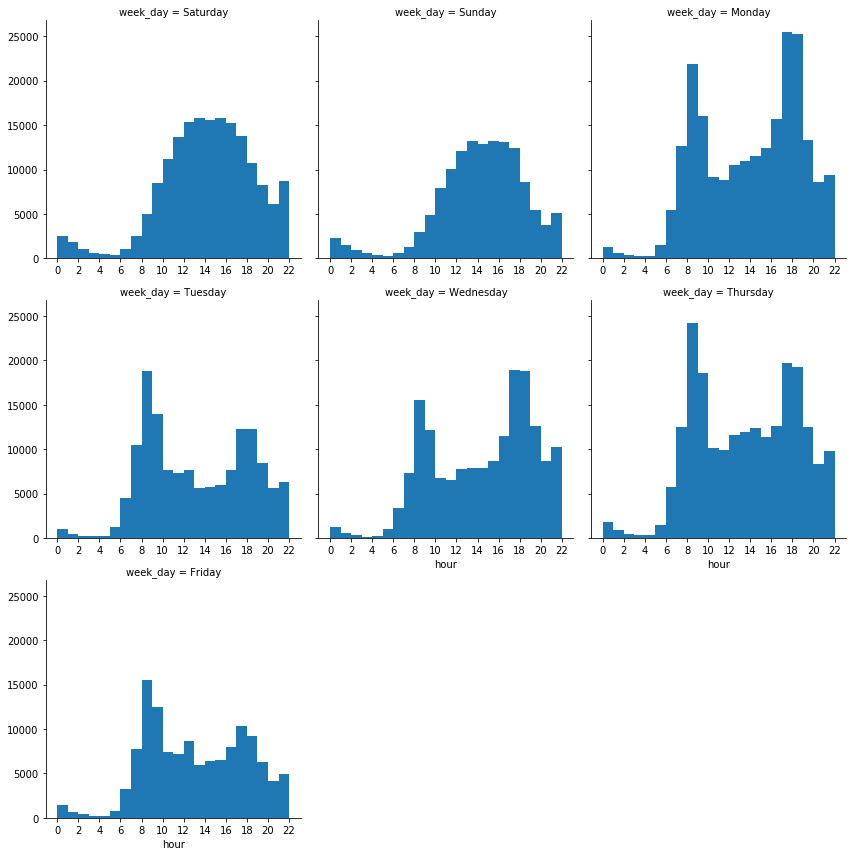

In [79]:
week_day_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

g = sns.FacetGrid(df, col='week_day', col_wrap=3, sharex=False, height=4, col_order=week_day_order)
g.map(plt.hist, 'hour',bins=np.arange(0,23,1))
g.set(xticks=np.arange(0,23,2));

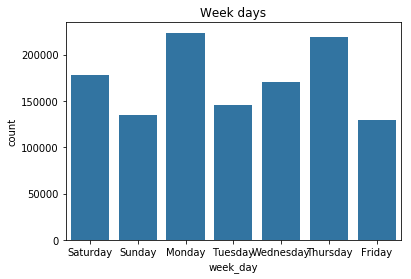

In [73]:
sns.countplot(df.week_day, order=order['week day'], color=base_color);
plt.title('Week days')

plt.show()

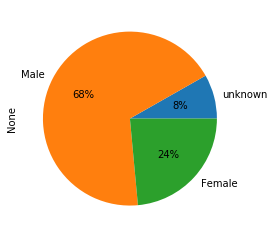

In [12]:
label = ['unknown', 'Male', 'Female']
df.groupby('gender').size().plot(kind='pie',labels=label,  autopct='%1.0f%%');

Text(0, 0.5, '')

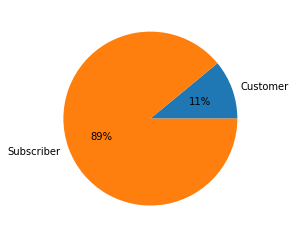

In [14]:
df.groupby('usertype').size().plot(kind='pie', autopct='%1.0f%%');
plt.ylabel('')

(1940, 2007)

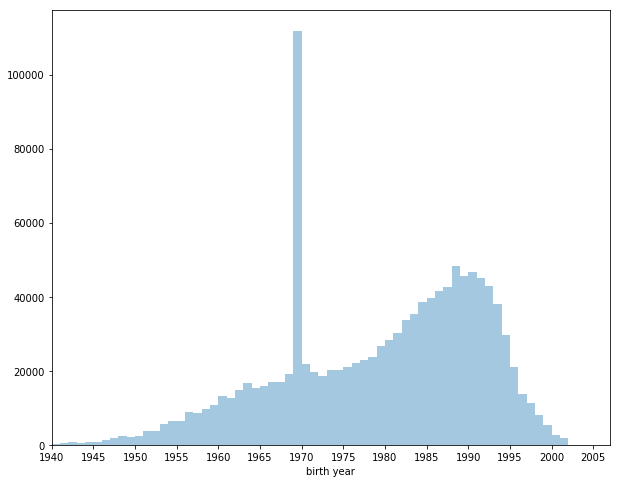

In [15]:
plt.figure(figsize=(10,8))
base_color = sns.color_palette()[0]
max_birth = df['birth year'].max()
bins = np.arange(1940, max_birth + 1, 1)
labels=np.arange(1940, max_birth + 5, 5)
sns.distplot(df['birth year'],bins=bins,kde=False, color=base_color);
plt.xticks(labels);
plt.xlim(1940, max_birth + 5)

The shape is sekead to left, with one big spike in year 1969.
After futhur investigaion, I found many customers sigend with 1969 birth year. This might be cuased by someone filled Null values with this specfic year.<br>
This quality issue must be solved to pr********

## Bivirate exploration

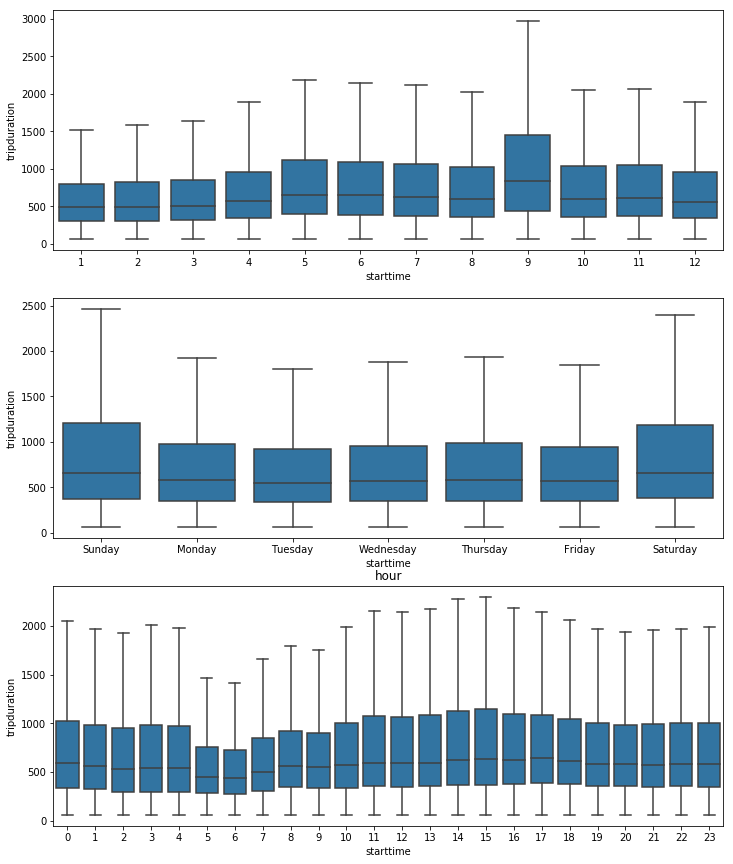

In [16]:
fig, ax = plt.subplots(nrows=3, figsize=(12,15))

plt.title('month')
sns.boxplot(df.starttime.dt.month, df.tripduration, showfliers=False, color=base_color, ax=ax[0])

plt.title('week day')
sns.boxplot(df.starttime.dt.day_name(), df.tripduration, showfliers=False, color=base_color, ax=ax[1])

plt.title('hour')
sns.boxplot(df.starttime.dt.hour, df.tripduration, showfliers=False, color=base_color, ax=ax[2])

plt.show()

/home/srap/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


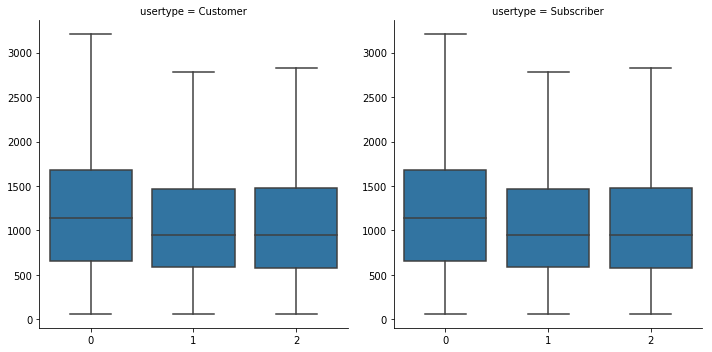

In [17]:
gender_df = df.groupby(['start station id','end station id','gender','usertype']). tripduration.mean().reset_index()
g = sns.FacetGrid(gender_df, col='usertype', sharey=False, height=5)
g.map(sns.boxplot, x='gender', y='tripduration', showfliers=False, data=gender_df)
plt.show()

(0, 5000)

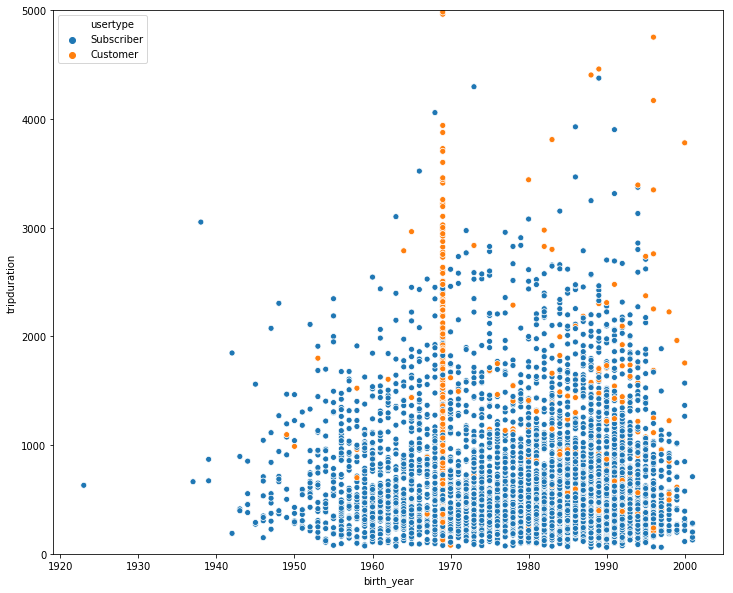

In [96]:
plt.figure(figsize=(12,10))
sns.scatterplot('birth_year', 'tripduration',hue='usertype', data=df.sample(5000),)
plt.ylim(0,5000)